# 1. Install Dependencies and Setup

In [ ]:
pip install tensorflow

In [ ]:
pip install opencv-python

In [ ]:
pip install matplotlib

In [ ]:
#!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [ ]:
!pip list

In [1]:
#NEW
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/Colab Notebooks/house_present_model"

/content/drive/MyDrive/Colab Notebooks/house_present_model


In [8]:
import tensorflow as tf
import os

In [ ]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [10]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Remove dodgy images

In [11]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [4]:
data_dir = os.getcwd()+'/data'

In [ ]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [ ]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [ ]:
img.shape

(640, 640, 3)

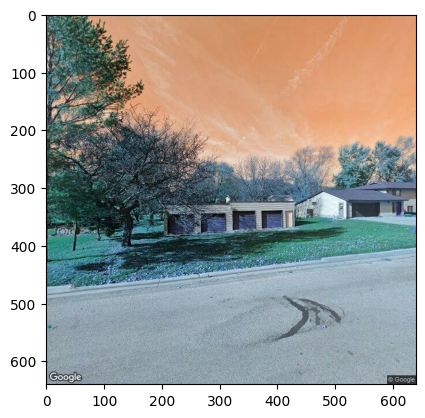

In [ ]:
plt.imshow(img)

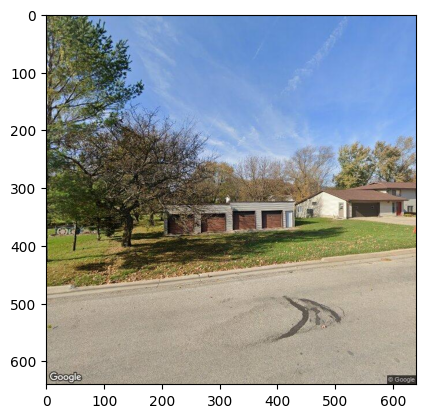

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

# 3. Load Data

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
# classifies the input images as 1 or 0 so that when you train the image the model knows which classification each image is given
data = tf.keras.utils.image_dataset_from_directory('data')

NotFoundError: ignored

In [188]:
data_iterator = data.as_numpy_iterator()

In [189]:
len(list(data_iterator))


7

In [138]:
batch = data_iterator.next()

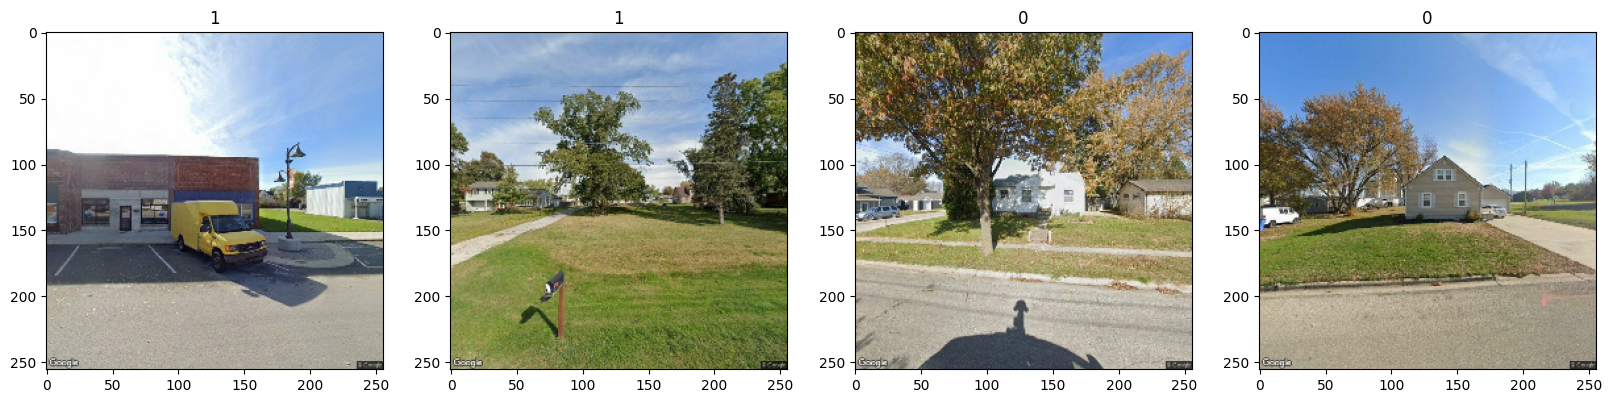

In [139]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])
#0 house present 1 no house present

# 4. Scale Data

In [140]:
data = data.map(lambda x,y: (x/255, y))

In [ ]:
data.as_numpy_iterator().next()

# 5. Split Data

In [142]:
len(data)

7

In [13]:
#70% testing 20% validation 10% testing
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

NameError: ignored

In [203]:
train_size+val_size+test_size

7

In [204]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [205]:
print(len(test))

print(len(val))

len(train)

1
2


4

# 6. Build Deep Learning Model

In [206]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [207]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [208]:
model = Sequential()

In [209]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
#activation = 'softmax' for dense layers greater than 1

In [210]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [211]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 30, 30, 16)      

# 7. Train

In [212]:
logdir='logs'

In [213]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [214]:
#NEW
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val.cache().prefetch(buffer_size=AUTOTUNE)

In [215]:
hist = model.fit(train_ds, epochs=20, validation_data=val_ds, callbacks=[tensorboard_callback])

Epoch 1/20
4/4 [==============================] - 6s 966ms/step - loss: 226.8685 - accuracy: 0.5078 - val_loss: 37.1983 - val_accuracy: 0.6562
Epoch 2/20
4/4 [==============================] - 0s 62ms/step - loss: 18.7463 - accuracy: 0.6719 - val_loss: 5.1532 - val_accuracy: 0.3438
Epoch 3/20
4/4 [==============================] - 0s 51ms/step - loss: 1.8636 - accuracy: 0.6094 - val_loss: 0.6645 - val_accuracy: 0.8125
Epoch 4/20
4/4 [==============================] - 0s 50ms/step - loss: 0.4419 - accuracy: 0.7656 - val_loss: 0.4569 - val_accuracy: 0.7969
Epoch 5/20
4/4 [==============================] - 0s 48ms/step - loss: 0.4096 - accuracy: 0.8203 - val_loss: 0.3833 - val_accuracy: 0.8438
Epoch 6/20
4/4 [==============================] - 0s 46ms/step - loss: 0.2790 - accuracy: 0.9219 - val_loss: 0.3049 - val_accuracy: 0.8750
Epoch 7/20
4/4 [==============================] - 0s 44ms/step - loss: 0.1318 - accuracy: 0.9453 - val_loss: 0.2730 - val_accuracy: 0.8906
Epoch 8/20
4/4 [======

# 8. Plot Performance

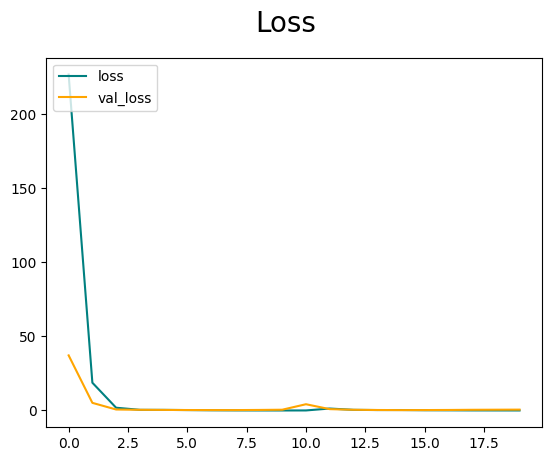

In [216]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

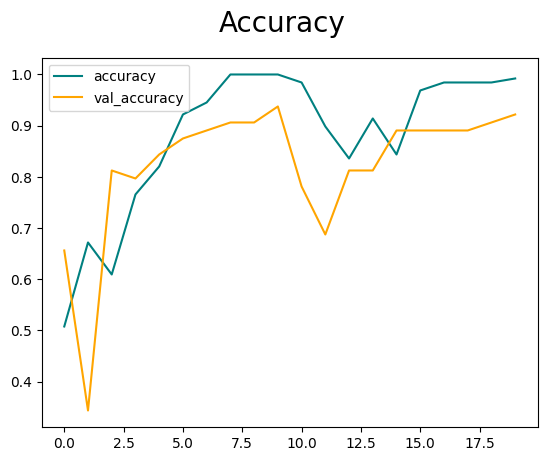

In [217]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [218]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [219]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [220]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    print(yhat)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 81ms/step
[[2.8368576e-17]
 [1.0423759e-10]
 [2.3829158e-10]
 [8.0947977e-01]
 [4.1961110e-01]
 [5.2400272e-05]
 [3.8279538e-04]
 [1.7049222e-23]
 [6.8995291e-07]
 [1.0000000e+00]
 [5.0970447e-01]
 [6.1796010e-17]
 [9.9966836e-01]
 [1.3947943e-14]]


In [221]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [222]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


# 10. Test

In [223]:
import cv2

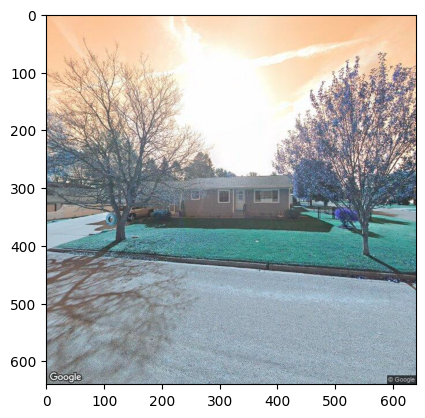

In [240]:
#img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/house_present_model/data/G_D_ 7TH AVE NW_.jpg')
#img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/house_present_model/data/G_D_ 7TH ST NW_.jpg')
#img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/house_present_model/data/G_D_124 2ND AVE SW_.jpg')
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/house_present_model/data/Copy of G_G_108 E AVE_.png')
plt.imshow(img)
plt.show()

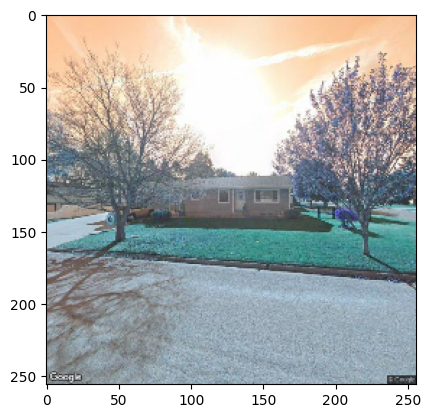

In [241]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [242]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 20ms/step


In [243]:
yhat

array([[0.510714]], dtype=float32)

In [244]:
if yhat > 0.5:
    print(f'No house present')
else:
    print(f'House present')

No house present


# 11. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','house_present_classifier.h5'))

In [ ]:
new_model = load_model(os.path.join('models', 'house_present_classifier.h5'))

In [ ]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 83ms/step


array([[0.9595608]], dtype=float32)

In [ ]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0